In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df

Id  carat        cut color clarity  depth  table    price     x  \
0          1   1.06      Ideal     I     SI2   61.8   57.0   4270.0  6.57   
1          2   1.51    Premium     G    VVS2   60.9   58.0  15164.0  7.38   
2          3   0.32      Ideal     F     VS2   61.3   56.0    828.0  4.43   
3          4   0.53      Ideal     G     VS2   61.2   56.0   1577.0  5.19   
4          5   0.70    Premium     H    VVS2   61.0   57.0   2596.0  5.76   
...      ...    ...        ...   ...     ...    ...    ...      ...   ...   
19373  19374   0.41  Very Good     E    VVS1   60.0   61.0   1057.0  4.78   
19374  19375   0.93      Ideal     I     SI1   61.9   57.0   3359.0  6.23   
19375  19376   1.51    Premium     I     SI2   62.6   59.0   7162.0  7.28   
19376  19377   1.66  Very Good     E     SI1   61.7   58.0  12818.0  7.52   
19377  19378   0.41    Premium     D     SI1   59.2   62.0      NaN   NaN   

          y     z  
0      6.60  4.07  
1      7.42  4.51  
2      4.41  2.71  
3      5.22  3.19  
4      5.72  3.50  
...     ...   ...  
19373  4.86  2.89  
19374  6.21  3.85  
19375  7.31  4.57  
19376  7.59  4.66  
19377   NaN   NaN  

[19378 rows x 11 columns]

# data analysis

In [ ]:
df.describe()

Id         carat         depth         table         price  \
count  19378.000000  19378.000000  19378.000000  19378.000000  19377.000000   
mean    9689.500000      0.796721     61.749236     57.461384   3933.166486   
std     5594.091094      0.470094      1.409537      2.219875   3996.687109   
min        1.000000      0.200000     43.000000     49.000000    327.000000   
25%     4845.250000      0.400000     61.000000     56.000000    954.000000   
50%     9689.500000      0.700000     61.800000     57.000000   2402.000000   
75%    14533.750000      1.040000     62.500000     59.000000   5323.000000   
max    19378.000000      4.010000     72.200000     76.000000  18823.000000   

                  x             y             z  
count  19377.000000  19377.000000  19377.000000  
mean       5.730981      5.732525      3.538565  
std        1.115576      1.108074      0.721084  
min        0.000000      0.000000      0.000000  
25%        4.720000      4.730000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.030000  
max       10.020000      9.940000     31.800000

In [ ]:
df.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      1
x          1
y          1
z          1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19378 entries, 0 to 19377
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       19378 non-null  int64  
 1   carat    19378 non-null  float64
 2   cut      19378 non-null  object 
 3   color    19378 non-null  object 
 4   clarity  19378 non-null  object 
 5   depth    19378 non-null  float64
 6   table    19378 non-null  float64
 7   price    19377 non-null  float64
 8   x        19377 non-null  float64
 9   y        19377 non-null  float64
 10  z        19377 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

Ideal

Premium

Very good

Good

Fair

Poor

In [ ]:
df["cut"].value_counts()

cut
Ideal        7750
Premium      4998
Very Good    4334
Good         1738
Fair          558
Name: count, dtype: int64

In [ ]:
df["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
df["clarity"].value_counts()

clarity
SI1     4683
VS2     4377
SI2     3301
VS1     2963
VVS2    1826
VVS1    1298
IF       675
I1       255
Name: count, dtype: int64

In [ ]:
df["color"].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [ ]:
df["color"].value_counts()

color
G    4110
E    3430
F    3377
H    3024
D    2425
I    1978
J    1034
Name: count, dtype: int64

#Data Visualization

In [ ]:
corr_data=df.drop(['color','clarity','cut'],axis=1)

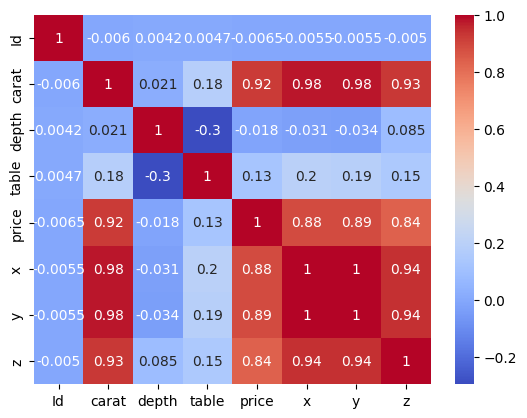

In [ ]:

sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.show()

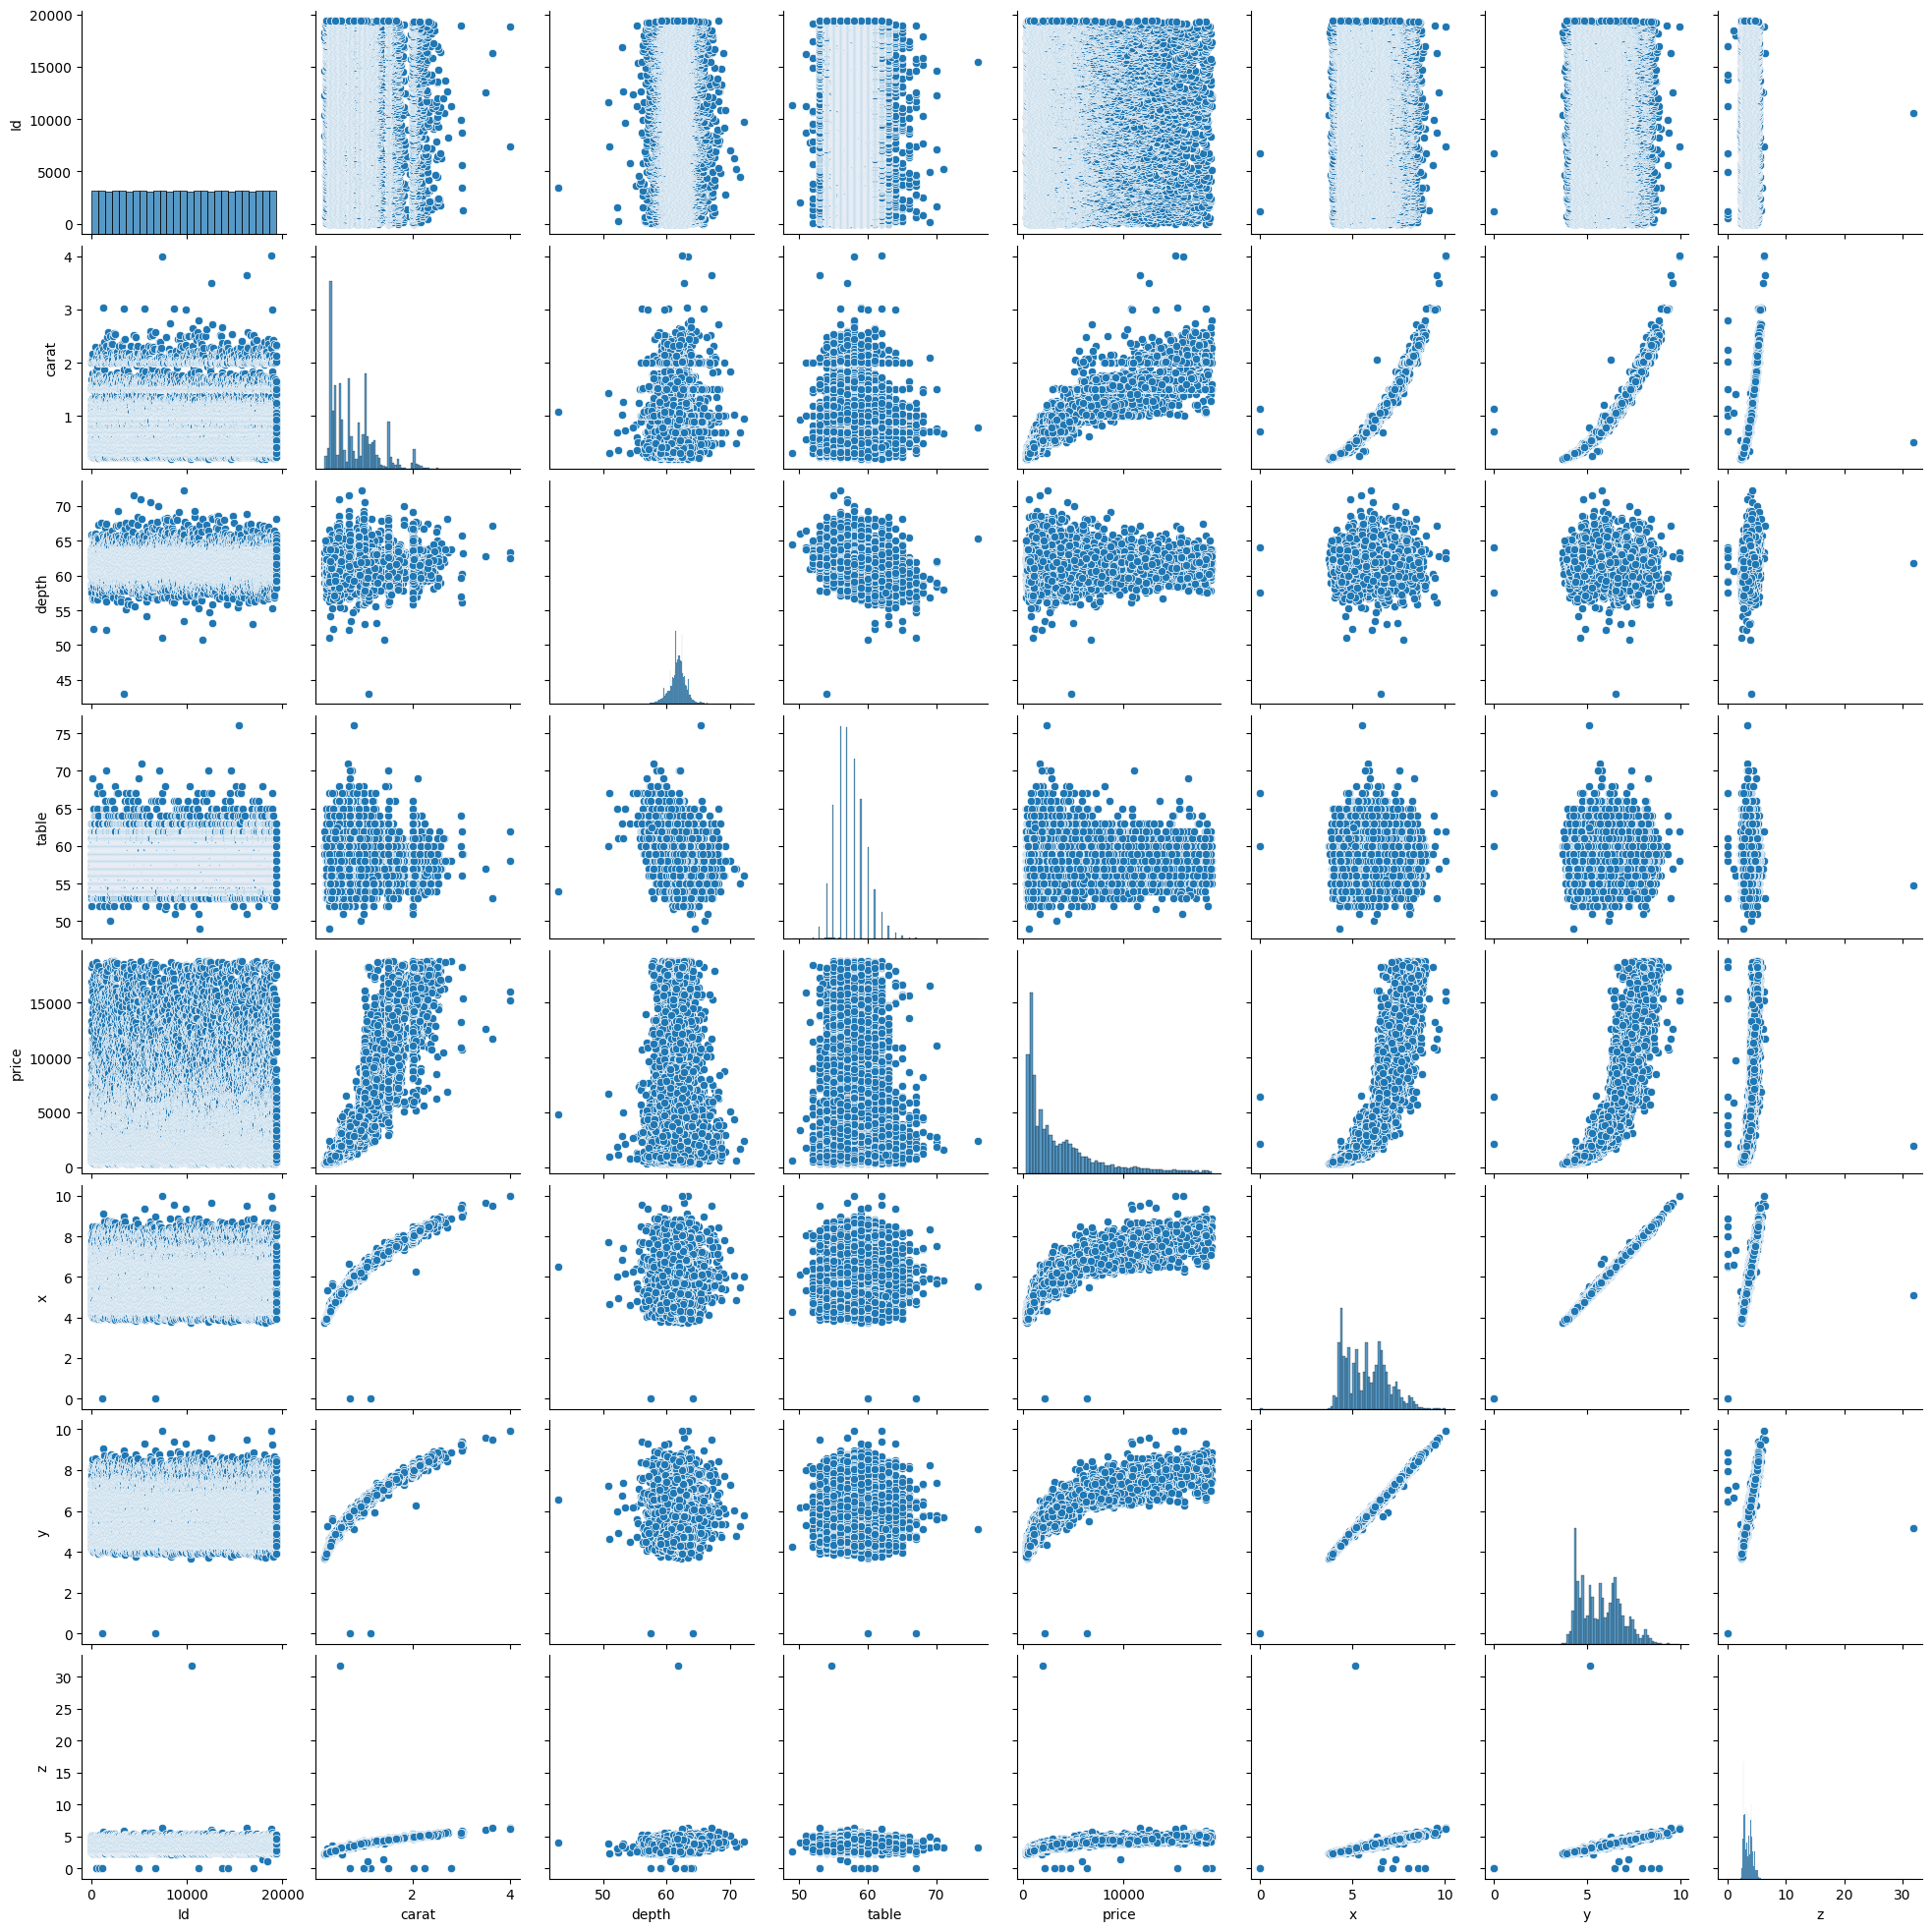

In [ ]:
sns.pairplot(df)

#processing data

there outleyer in the y, x


there is high  linear relation between carat and price

In [ ]:
mean_cut_price=df.groupby('cut')['price'].mean()
mean_cut_price

cut
Fair         3952.876344
Good         4028.122555
Ideal        3425.504258
Premium      4574.012007
Very Good    4061.464928
Name: price, dtype: float64

<Axes: xlabel='cut', ylabel='price'>

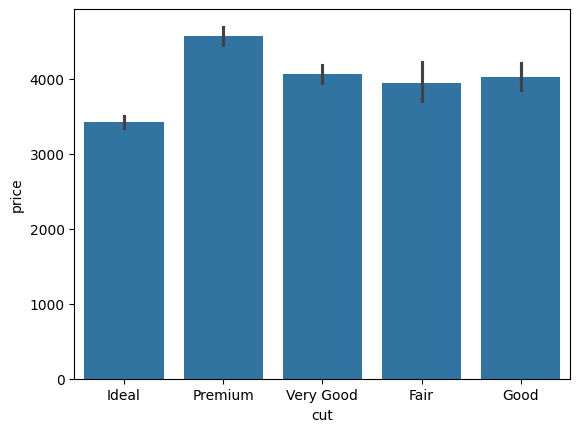

In [ ]:
sns.barplot(x=df['cut'], y=df['price'])

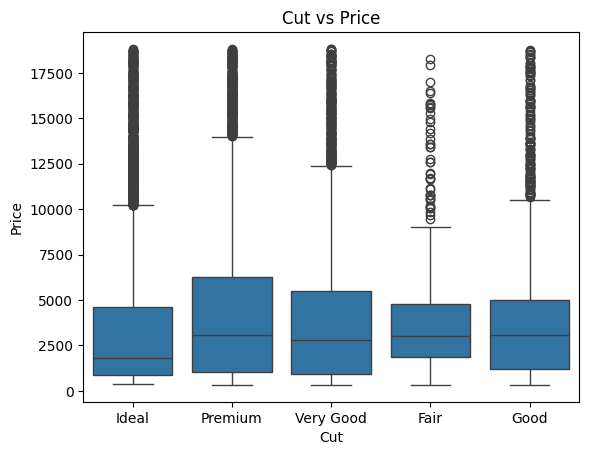

In [ ]:
sns.boxplot(x=df['cut'], y=df['price'])
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Cut vs Price')
plt.show()

In [ ]:
color_mean_price=df.groupby('color')['price'].mean()
color_mean_price

color
D    3287.941419
E    3124.758892
F    3708.270358
G    3952.764964
H    4495.021825
I    5017.819515
J    5065.945841
Name: price, dtype: float64

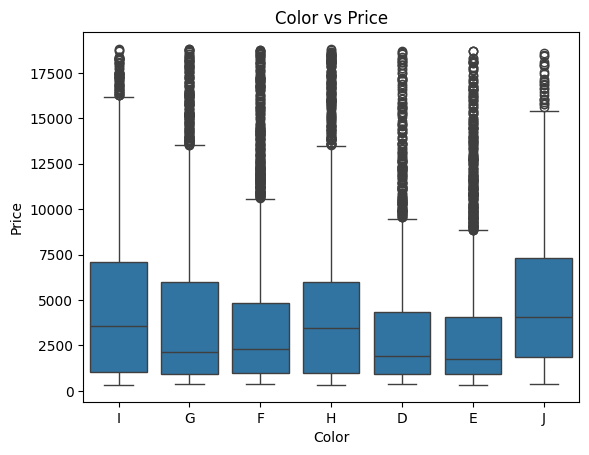

In [ ]:
sns.boxplot(x=df['color'], y=df['price'])
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Color vs Price')
plt.show()

In [ ]:
df.groupby('cut')['price'].mean().sort_values()

cut
Ideal        3425.504258
Fair         3952.876344
Good         4028.122555
Very Good    4061.464928
Premium      4574.012007
Name: price, dtype: float64

In [ ]:
df.groupby("color")["price"].mean().sort_values()

color
E    3124.758892
D    3287.941419
F    3708.270358
G    3952.764964
H    4495.021825
I    5017.819515
J    5065.945841
Name: price, dtype: float64

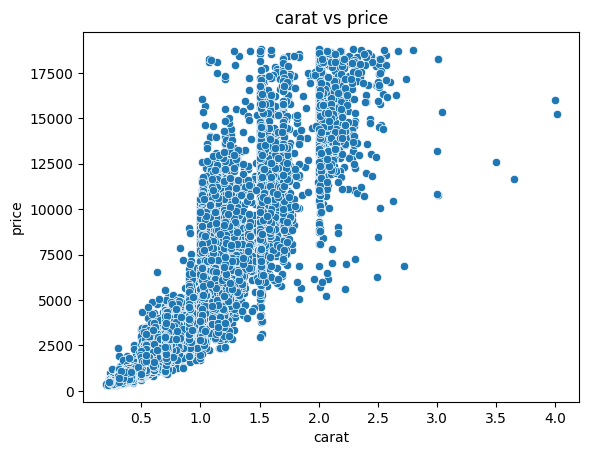

In [ ]:
sns.scatterplot(x=df['carat'],y=df['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title('carat vs price')
plt.show()

#***numerical data***

In [ ]:
numerical_columns=df.select_dtypes(include='number').columns.tolist()
numerical_columns


['Id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
categorical_column =df.select_dtypes(exclude='number').columns.tolist()
categorical_column

['cut', 'color', 'clarity']

In [ ]:
data=df.copy()

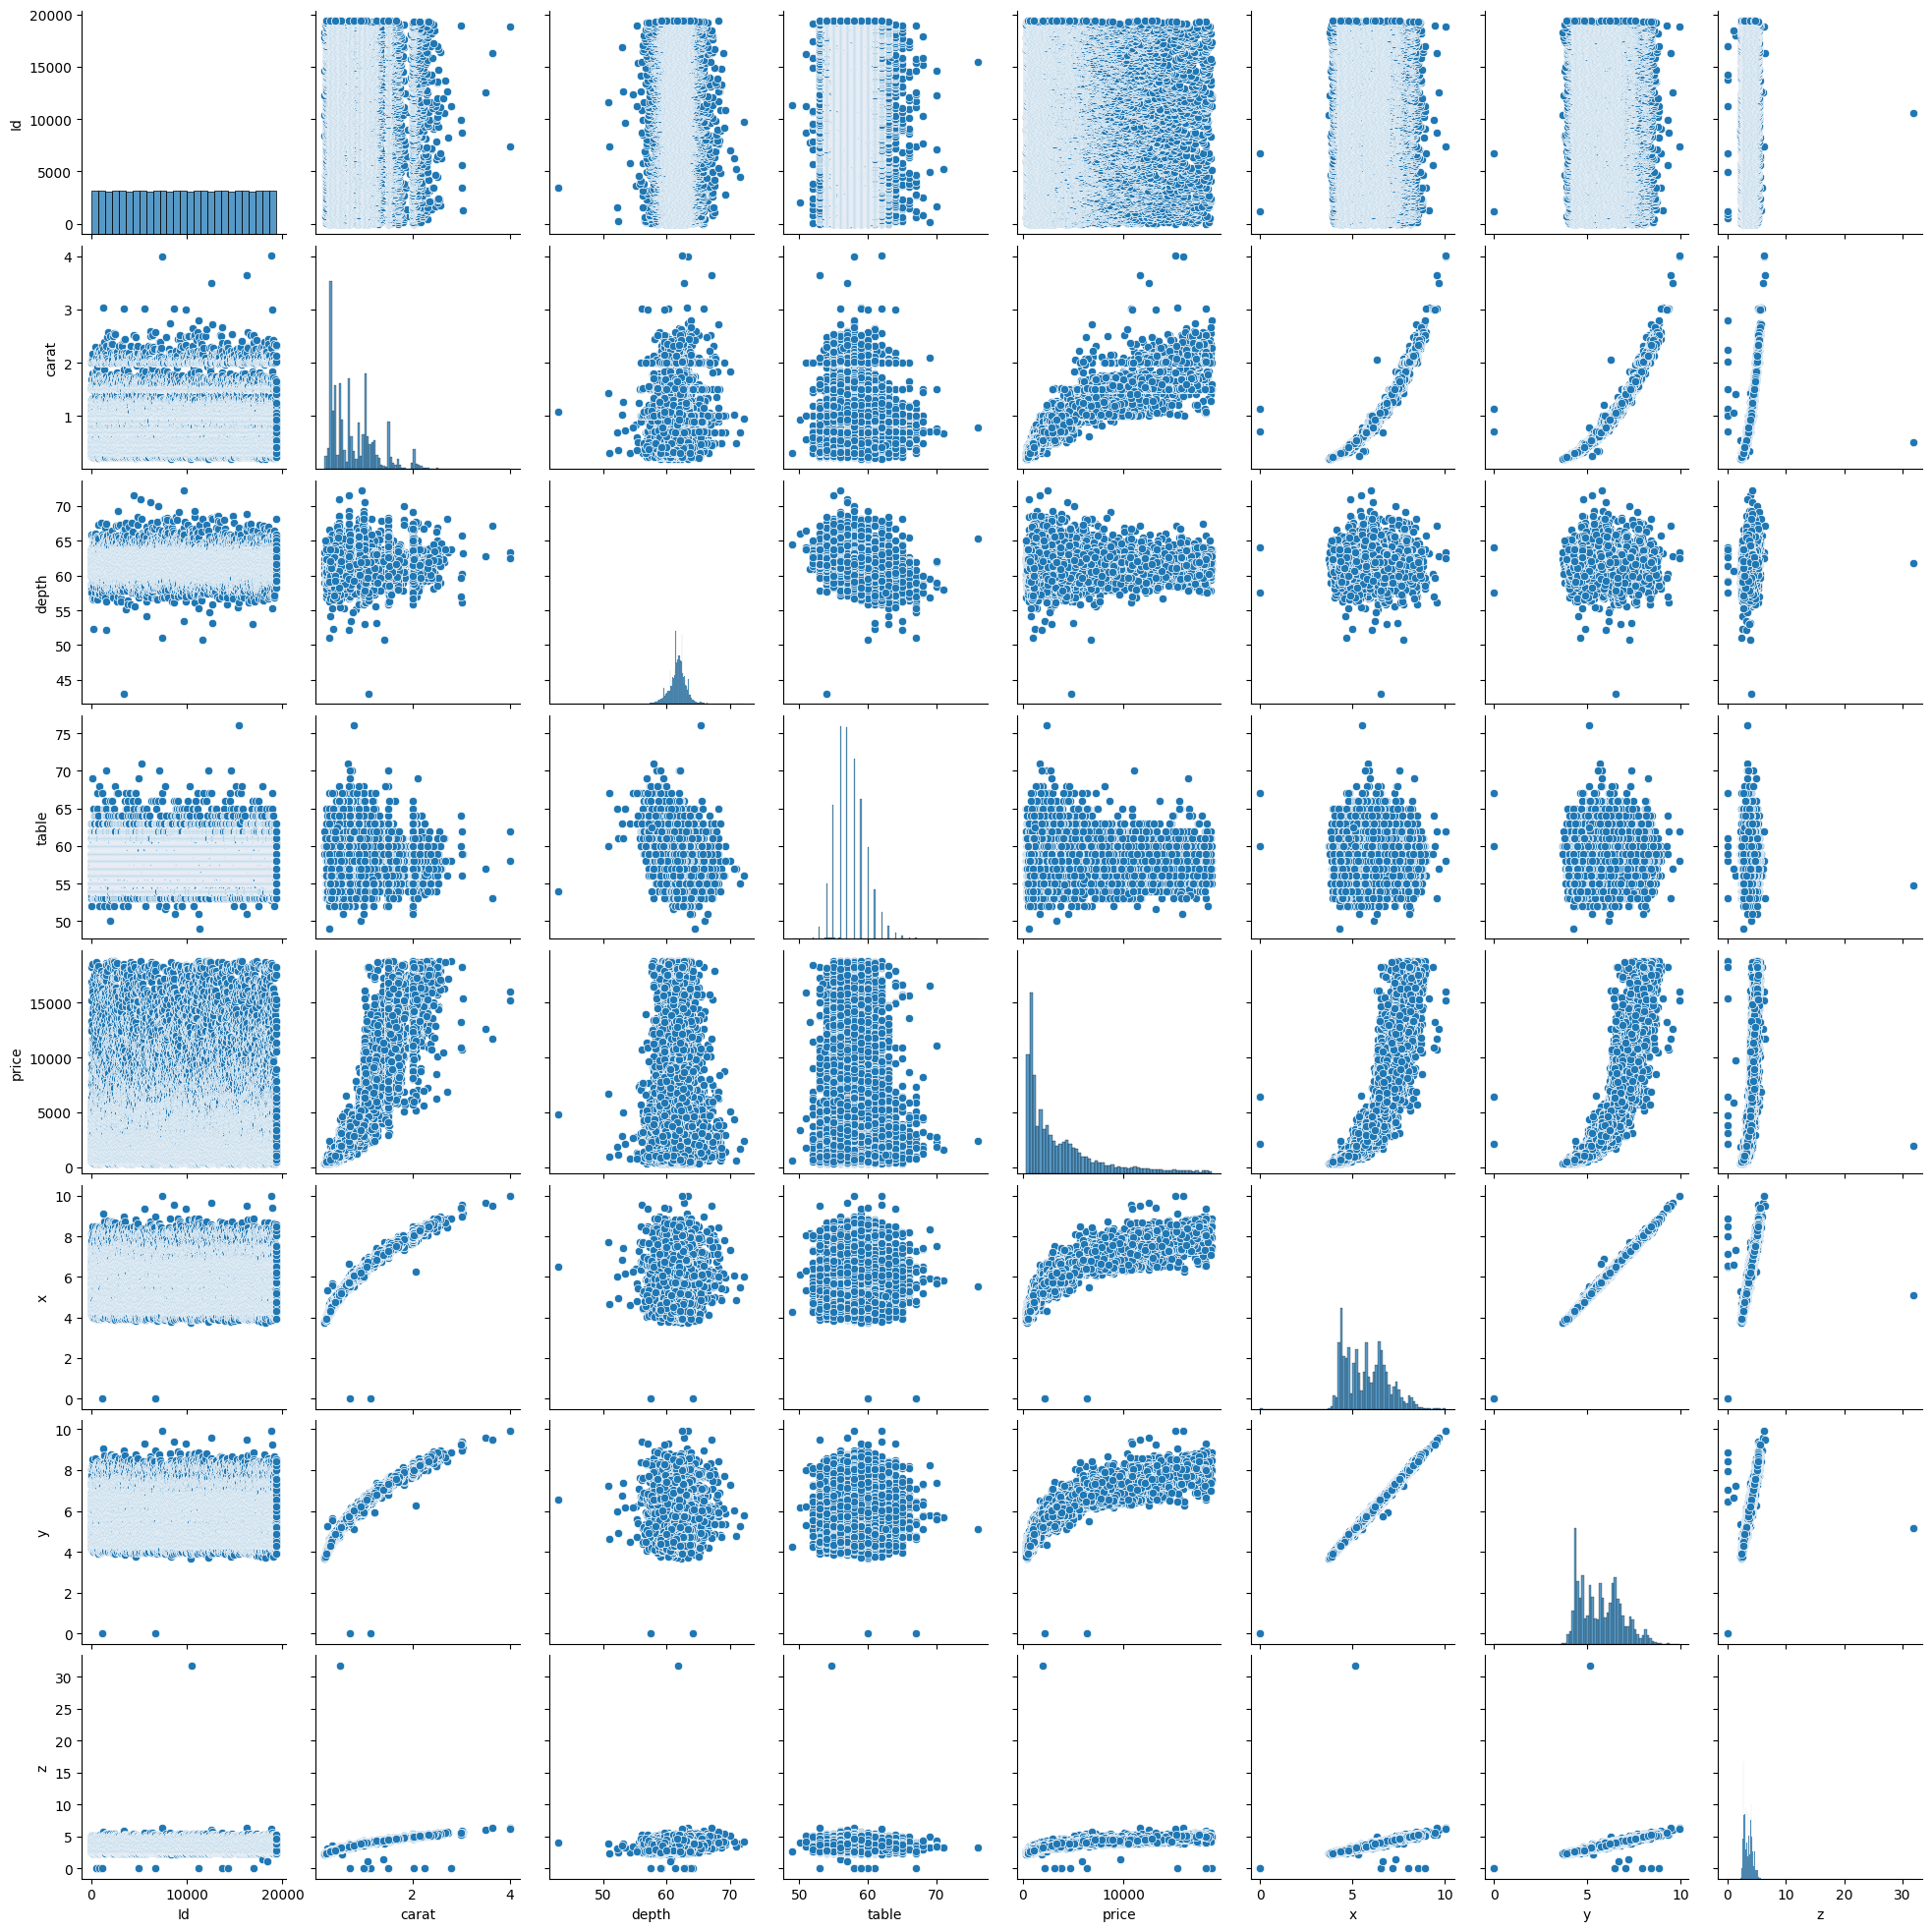

In [ ]:
sns.pairplot(df[numerical_columns])

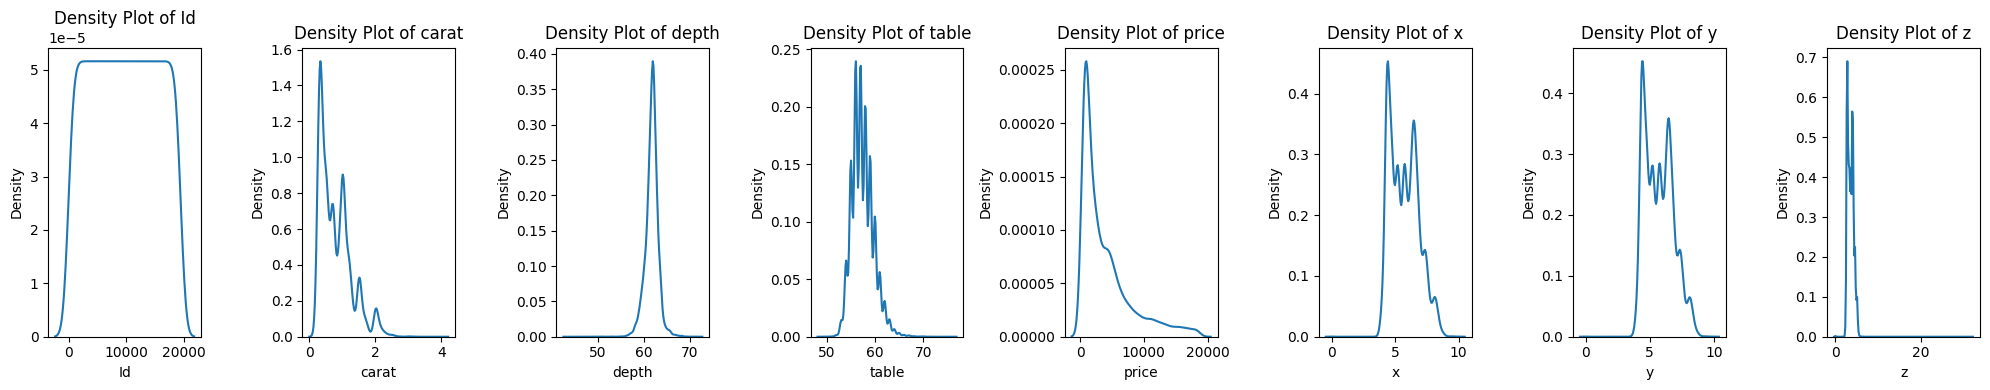

In [ ]:
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(20, 4))

# Iterate over columns and plot density plots
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df[column], ax=axs[i])
    axs[i].set_title(f'Density Plot of {column}')

plt.tight_layout()
plt.show()

<Axes: xlabel='price', ylabel='x'>

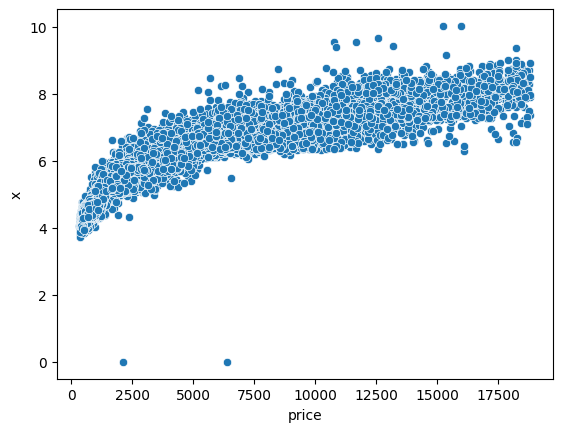

In [ ]:
sns.scatterplot(x='price', y='x', data=df)

In [ ]:
df=df[df['x']>2]

<Axes: xlabel='price', ylabel='y'>

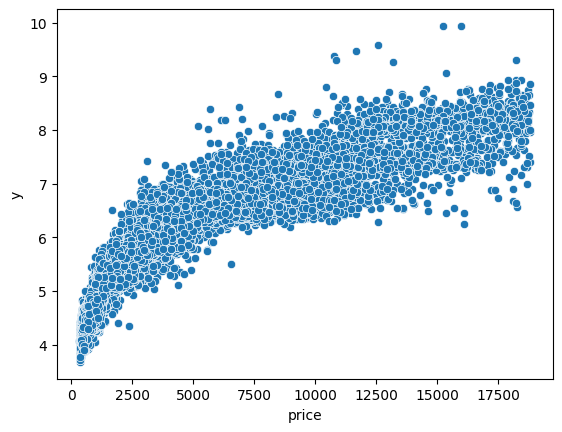

In [ ]:
sns.scatterplot(x='price', y='y', data=df)

<Axes: xlabel='price', ylabel='z'>

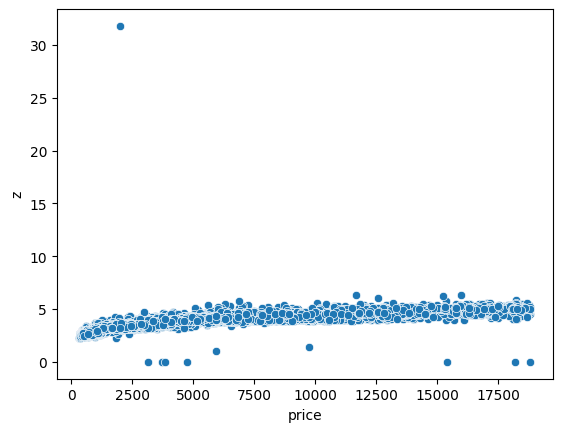

In [ ]:
sns.scatterplot(x='price', y='z', data=df)

In [ ]:
df=df[df['z']>0]
df=df[df['z']<10]

<Axes: xlabel='price', ylabel='z'>

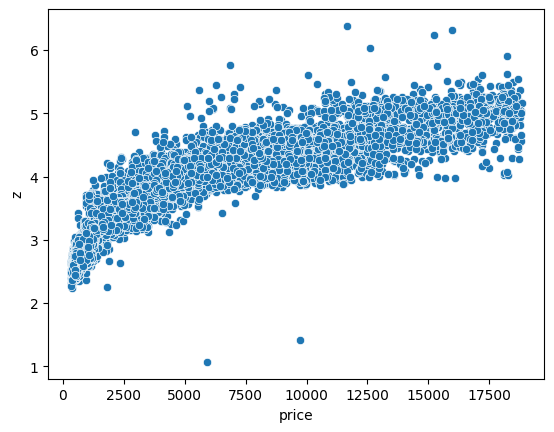

In [ ]:
sns.scatterplot(x='price', y='z', data=df)

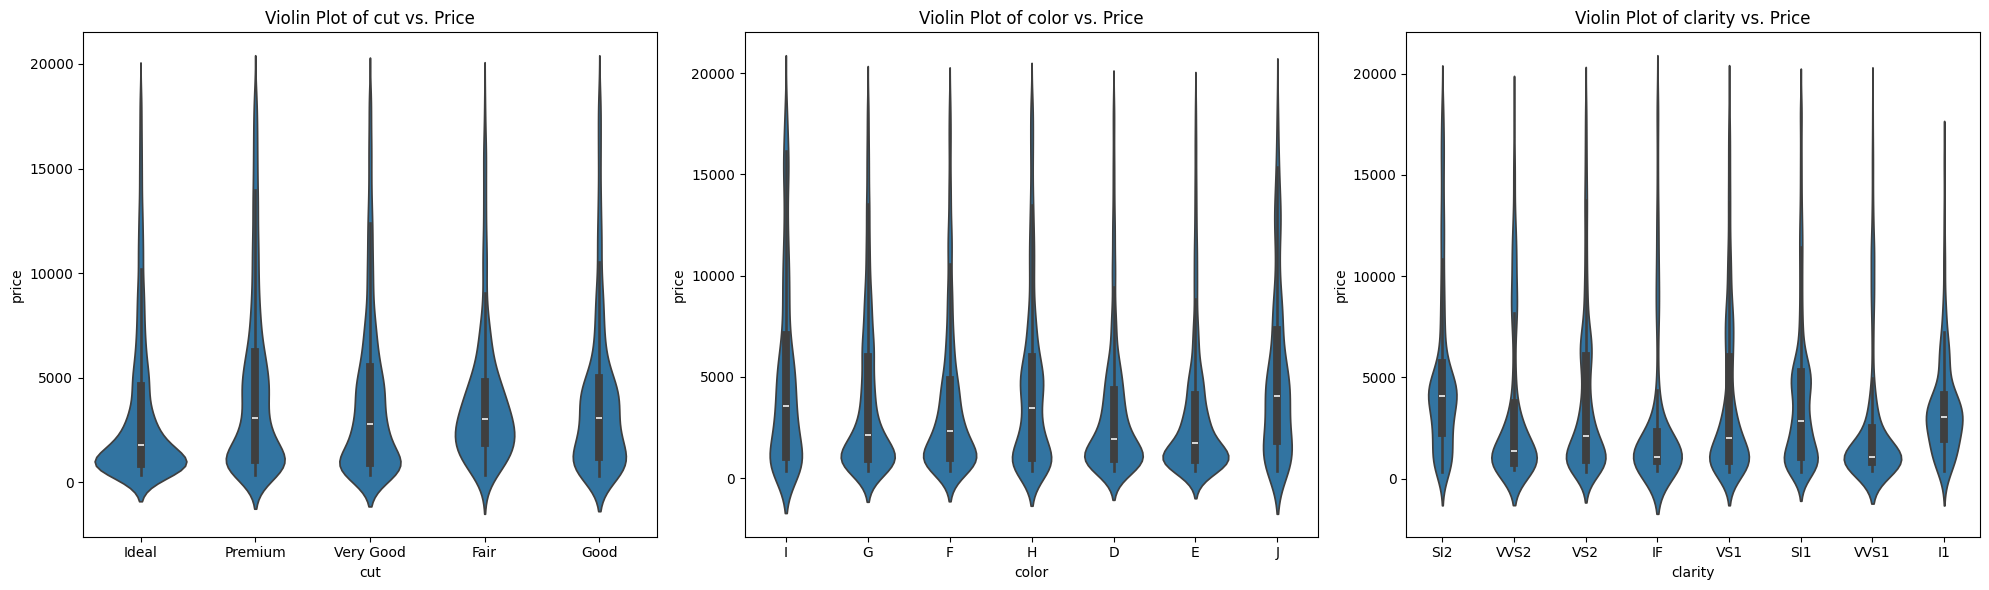

In [ ]:
from re import Pattern
fig, axs = plt.subplots(1, len(categorical_column), figsize=(20, 6))
for i, column in enumerate(categorical_column):
    sns.violinplot(x=column, y='price', data=df, ax=axs[i])
    axs[i].set_title(f'Violin Plot of {column} vs. Price')

plt.tight_layout()
plt.show()

##encoded DataFrame

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded_columns=encoder.fit_transform(df[categorical_column]).toarray()

In [ ]:
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_column))

In [ ]:
df_encoded = pd.concat([df.drop(columns=categorical_column), encoded_df], axis=1)
print(df_encoded)

        Id  carat  depth  table    price     x     y     z  cut_Fair  \
0      1.0   1.06   61.8   57.0   4270.0  6.57  6.60  4.07       0.0   
1      2.0   1.51   60.9   58.0  15164.0  7.38  7.42  4.51       0.0   
2      3.0   0.32   61.3   56.0    828.0  4.43  4.41  2.71       0.0   
3      4.0   0.53   61.2   56.0   1577.0  5.19  5.22  3.19       0.0   
4      5.0   0.70   61.0   57.0   2596.0  5.76  5.72  3.50       0.0   
...    ...    ...    ...    ...      ...   ...   ...   ...       ...   
10541  NaN    NaN    NaN    NaN      NaN   NaN   NaN   NaN       0.0   
11221  NaN    NaN    NaN    NaN      NaN   NaN   NaN   NaN       0.0   
13727  NaN    NaN    NaN    NaN      NaN   NaN   NaN   NaN       1.0   
14265  NaN    NaN    NaN    NaN      NaN   NaN   NaN   NaN       0.0   
16971  NaN    NaN    NaN    NaN      NaN   NaN   NaN   NaN       0.0   

       cut_Good  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0           0.0  ...      1.0      0.0         0.0      

In [ ]:
df_encoded.head()

Id  carat  depth  table    price     x     y     z  cut_Fair  cut_Good  \
0  1.0   1.06   61.8   57.0   4270.0  6.57  6.60  4.07       0.0       0.0   
1  2.0   1.51   60.9   58.0  15164.0  7.38  7.42  4.51       0.0       0.0   
2  3.0   0.32   61.3   56.0    828.0  4.43  4.41  2.71       0.0       0.0   
3  4.0   0.53   61.2   56.0   1577.0  5.19  5.22  3.19       0.0       0.0   
4  5.0   0.70   61.0   57.0   2596.0  5.76  5.72  3.50       0.0       0.0   

   ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  clarity_SI2  \
0  ...      1.0      0.0         0.0         0.0          0.0          1.0   
1  ...      0.0      0.0         0.0         0.0          0.0          0.0   
2  ...      0.0      0.0         0.0         0.0          0.0          0.0   
3  ...      0.0      0.0         0.0         0.0          0.0          0.0   
4  ...      0.0      0.0         0.0         0.0          0.0          0.0   

   clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0          0.0          0.0           0.0           0.0  
1          0.0          0.0           0.0           1.0  
2          0.0          1.0           0.0           0.0  
3          0.0          1.0           0.0           0.0  
4          0.0          0.0           0.0           1.0  

[5 rows x 28 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=df.drop(['price'], axis=1)
y=df['price']
X.head()

Id  carat      cut color clarity  depth  table     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0  5.76  5.72  3.50

In [ ]:
num_columns=X.select_dtypes(include=['number']).columns.tolist()
cat_columns=X.select_dtypes(exclude=['number']).columns.tolist()
scaled_numerical_data=scaler.fit_transform(X[num_columns])
scaled_df=pd.DataFrame(scaled_numerical_data, columns=num_columns)
scaled_df.head()


Id     carat     depth     table         x         y         z
0 -1.732168  0.561103  0.035901 -0.207557  0.753372  0.784168  0.772329
1 -1.731989  1.519080 -0.602902  0.243189  1.480690  1.525443  1.411999
2 -1.731811 -1.014236 -0.318990 -0.658303 -1.168182 -1.195577 -1.204834
3 -1.731632 -0.567181 -0.389968 -0.658303 -0.485761 -0.463342 -0.507012
4 -1.731453 -0.205278 -0.531924 -0.207557  0.026055 -0.011346 -0.056335

In [ ]:
X = pd.concat([scaled_df, encoded_df], axis=1)
X.head()

Id     carat     depth     table         x         y         z  \
0 -1.732168  0.561103  0.035901 -0.207557  0.753372  0.784168  0.772329   
1 -1.731989  1.519080 -0.602902  0.243189  1.480690  1.525443  1.411999   
2 -1.731811 -1.014236 -0.318990 -0.658303 -1.168182 -1.195577 -1.204834   
3 -1.731632 -0.567181 -0.389968 -0.658303 -0.485761 -0.463342 -0.507012   
4 -1.731453 -0.205278 -0.531924 -0.207557  0.026055 -0.011346 -0.056335   

   cut_Fair  cut_Good  cut_Ideal  ...  color_I  color_J  clarity_I1  \
0       0.0       0.0        1.0  ...      1.0      0.0         0.0   
1       0.0       0.0        0.0  ...      0.0      0.0         0.0   
2       0.0       0.0        1.0  ...      0.0      0.0         0.0   
3       0.0       0.0        1.0  ...      0.0      0.0         0.0   
4       0.0       0.0        0.0  ...      0.0      0.0         0.0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0         0.0          0.0          1.0          0.0          0.0   
1         0.0          0.0          0.0          0.0          0.0   
2         0.0          0.0          0.0          0.0          1.0   
3         0.0          0.0          0.0          0.0          1.0   
4         0.0          0.0          0.0          0.0          0.0   

   clarity_VVS1  clarity_VVS2  
0           0.0           0.0  
1           0.0           1.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           1.0  

[5 rows x 27 columns]

##machine learning module

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1161484.9586896861
Mean Absolute Error: 730.5684000992122
R-squared: 0.9269383797838436


#test seslect models

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

# Fit models, make predictions, and compute MSE
mse_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse

# Print MSE results
for name, mse in mse_results.items():
    print(f"{name}: MSE = {mse}")

# Best model
best_model = min(mse_results, key=mse_results.get)
print(f"\nBest Model: {best_model}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.988e+08, tolerance: 2.473e+07
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1461
[LightGBM] [Info] Number of data points in the train set: 15493, number of used features: 27
[LightGBM] [Info] Start training from score 3925.418705
Linear Regression: MSE = 1161484.9586896861
Ridge Regression: MSE = 1161669.0769308272
Lasso Regression: MSE = 1166664.1282573421
SVR: MSE = 11733846.666154178
Decision Tree Regression: MSE = 658522.7302529685
Random Forest Regression: MSE = 342736.7252588023
XGBoost: MSE = 359221.8662185126
LightGBM: MSE = 324228.75539304933

Best Model: LightGBM


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

# Results dictionary
results = {}

# Iterate through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R-squared": r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.988e+08, tolerance: 2.473e+07
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1461
[LightGBM] [Info] Number of data points in the train set: 15493, number of used features: 27
[LightGBM] [Info] Start training from score 3925.418705


In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index')

# Print the DataFrame
print(results_df)

                                  MAE           MSE  R-squared
Linear Regression          730.568400  1.161485e+06   0.926938
Ridge Regression           730.470679  1.161669e+06   0.926927
Lasso Regression           728.922203  1.166664e+06   0.926613
SVR                       1805.213256  1.173385e+07   0.261898
Decision Tree Regression   416.386939  6.471222e+05   0.959294
Random Forest Regression   303.201458  3.425028e+05   0.978455
XGBoost                    308.927040  3.592219e+05   0.977404
LightGBM                   303.615538  3.242288e+05   0.979605


In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index')

# Print the DataFrame
print(results_df)

                                  MAE           MSE  R-squared
Linear Regression          730.568400  1.161485e+06   0.926938
Ridge Regression           730.470679  1.161669e+06   0.926927
Lasso Regression           728.922203  1.166664e+06   0.926613
SVR                       1805.213256  1.173385e+07   0.261898
Decision Tree Regression   416.386939  6.471222e+05   0.959294
Random Forest Regression   303.201458  3.425028e+05   0.978455
XGBoost                    308.927040  3.592219e+05   0.977404
LightGBM                   303.615538  3.242288e+05   0.979605


#**Best model for prediction price of diamond is Random Forest Regression  with MAE = 303.2014**